In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from metpy.calc import mixing_ratio_from_specific_humidity
from metpy.units import units
from wrf import wetbulb

import sounding_utils
from importlib import reload

from functools import partial

import sys
sys.path.append('../../') # lets us import ptype package from the subdir
import os
#import ptype.

## Select forecast hour and model

In [2]:
hour = '0000'
model = 'rap'

ds = sounding_utils.open_ds_dkimpara(hour,model)


In [3]:
ds = sounding_utils.wet_bulb_from_rel_humid(ds)

In [6]:
reload(sounding_utils)
plot_func = partial(sounding_utils.composites_multi_x_v2, 
                    ds=ds, 
                    y_col='heightAboveGround',
                    x_cols = ['t_h', 'wb_h'], 
                    markers=['o', '*'], 
                    plot_median=False
                    )

reload(sounding_utils)
plot_func = partial(sounding_utils.quantile_composites, 
                    ds=ds, 
                    y_col='heightAboveGround',
                    x_col = 'wbulb', 
                    markers=['o', '*'], 
                    colors=['b','g'],
                    plot_median=True
                    )

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': "Mean Interp. ['t_h', 'wb_h'] when models predicts frzr"}, xlabel="['t_h', 'wb_h']", ylabel='Height above ground (m)'>)

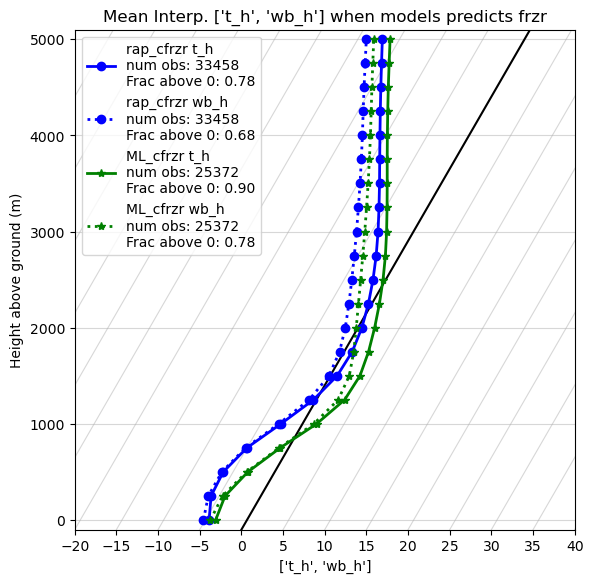

In [7]:
plot_func(cols=['cfrzr', 'ML_cfrzr'],xhighlim=40)

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': "Mean Interp. ['t_h', 'wb_h'] when models predicts icep"}, xlabel="['t_h', 'wb_h']", ylabel='Height above ground (m)'>)

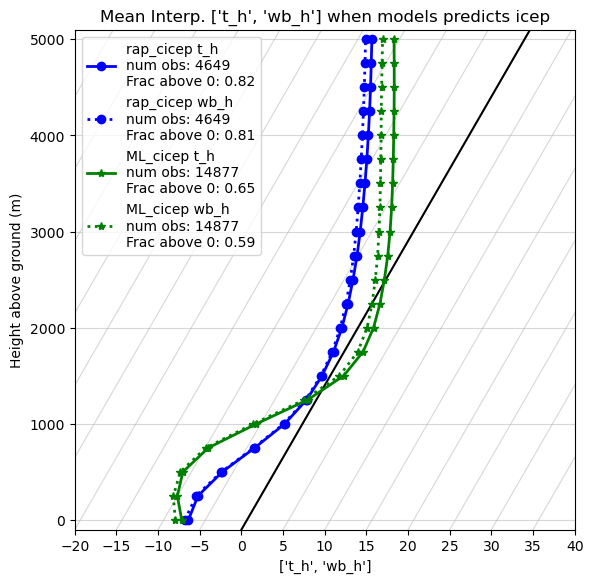

In [8]:
plot_func(cols=['cicep', 'ML_cicep'],xhighlim=40)

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': "Mean Interp. ['t_h', 'wb_h'] when models predicts snow"}, xlabel="['t_h', 'wb_h']", ylabel='Height above ground (m)'>)

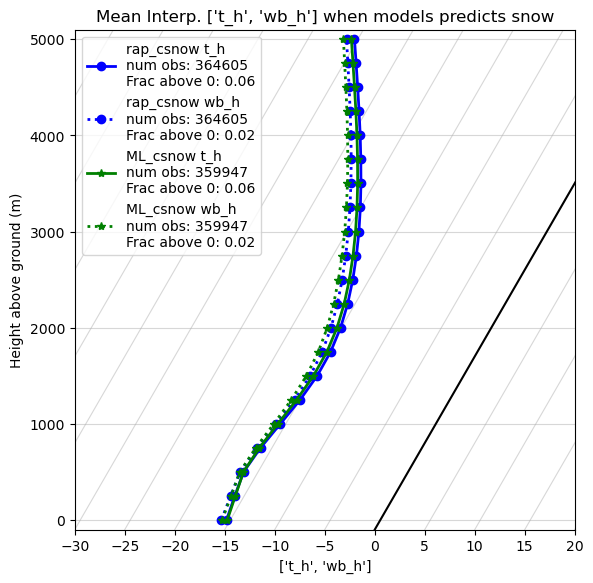

In [9]:
plot_func(cols = ['csnow', 'ML_csnow'],xlowlim=-30)

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': "Mean Interp. ['t_h', 'wb_h'] when models predicts rain"}, xlabel="['t_h', 'wb_h']", ylabel='Height above ground (m)'>)

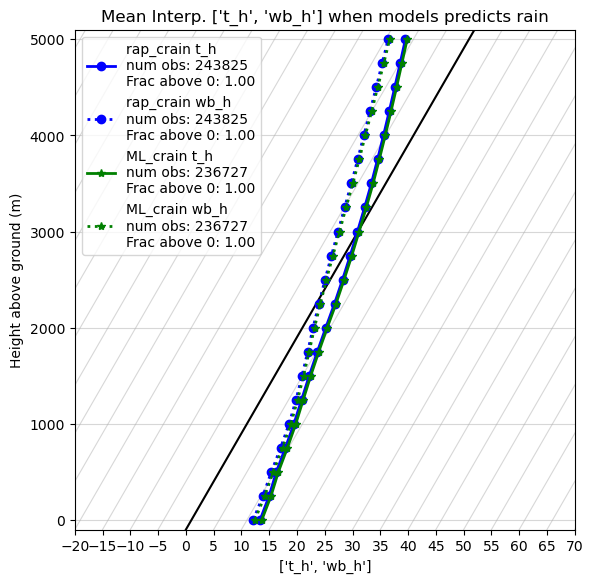

In [10]:
plot_func(cols =['crain', 'ML_crain'],xhighlim=70)